In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pyerrors as pe

In [2]:
plt.style.use('./base_style.mplstyle')
usetex = matplotlib.checkdep_usetex(True)
plt.rc('text', usetex=usetex)

We can load data from a preprocessed file which contains a list of `pyerror` `Obs`:

In [3]:
correlator_data = pe.input.json.load_json("./data/correlator_test")

Data has been written using pyerrors 2.0.0.
Format version 0.1
Written by fjosw on 2022-01-06 11:11:19 +0100 on host XPS139305, Linux-5.11.0-44-generic-x86_64-with-glibc2.29

Description:  Test data for the correlator example


With this list a `Corr` object can be initialised

In [4]:
my_correlator = pe.Corr(correlator_data)
my_correlator.gamma_method()

In [5]:
my_correlator.print([8, 14])

Corr T=96 N=1
x0/a	Corr(x0/a)
------------------
8	 548(13)
9	 433(11)
10	 343.1(8.6)
11	 273.2(6.6)
12	 217.5(5.6)
13	 172.9(4.9)
14	 137.6(4.6)



The `show` method can display the correlator. The argument <code>auto_gamma</code> tells `show` to calculate the y-errors using the gamma method with the default parameters.

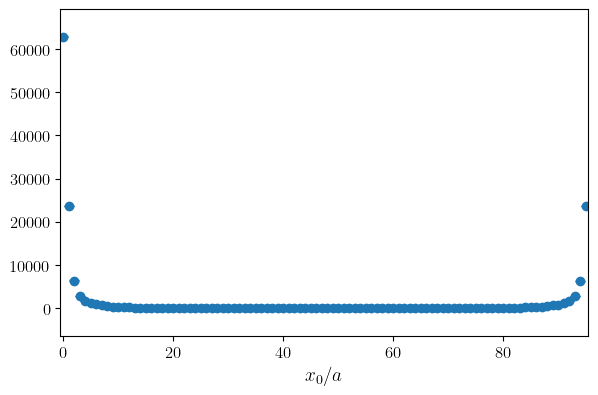

In [6]:
my_correlator.show(auto_gamma=True)

## Manipulating correlators

`Corr` objects can be shifted

In [7]:
shifted_correlator = my_correlator.roll(20)
shifted_correlator.tag = r'Correlator shifted by $x_0/a=20$'

or symmetrised

In [8]:
symmetrised_correlator = my_correlator.symmetric()
symmetrised_correlator.tag = 'Symmetrised correlator'

We can compare different `Corr` objects by passing `comp` to the `show` method

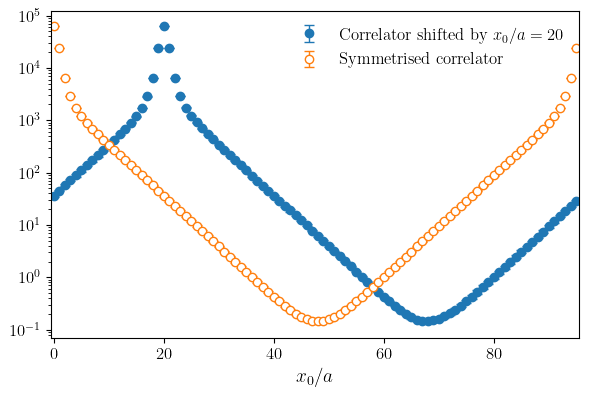

In [9]:
shifted_correlator.show(comp=symmetrised_correlator, logscale=True, auto_gamma=True)

## Effective mass

The effective mass of the correlator can be obtained by calling the `m_eff` method

In [10]:
m_eff = symmetrised_correlator.m_eff()
m_eff.tag = 'Effective mass'

We can also use the priodicity of the lattice in order to obtain the cosh effective mass

In [11]:
periodic_m_eff = symmetrised_correlator.m_eff('periodic')
periodic_m_eff.tag = 'Cosh effective mass'

We can compare the two and see how the standard effective mass deviates form the plateau at the center of the lattice

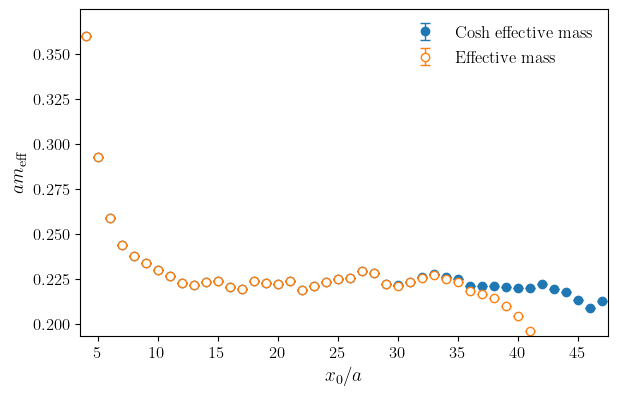

In [12]:
periodic_m_eff.show([4,47], comp=m_eff, ylabel=r'$am_\mathrm{eff}$')

Arithmetic operations and mathematical functions are also overloaded for the `Corr` class. We can compute the difference between the two variants of the effective mass as follows.

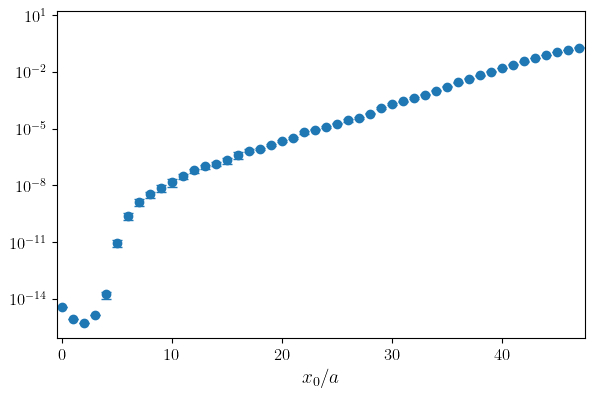

In [13]:
difference_m_eff = np.abs(periodic_m_eff - m_eff)
difference_m_eff.show([0, 47], logscale=True, auto_gamma=True)

## Derivatives

We can obtain derivatives of correlators in the following way

In [14]:
first_derivative = symmetrised_correlator.deriv()
first_derivative.tag = 'First derivative'

In [15]:
second_derivative = symmetrised_correlator.second_deriv()
second_derivative.tag = 'Second derivative'

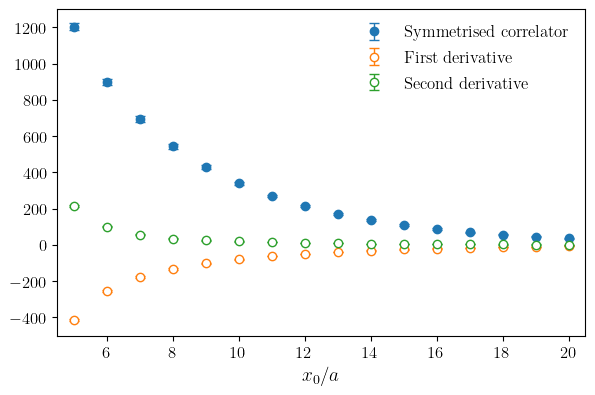

In [19]:
symmetrised_correlator.show([5, 20], comp=[first_derivative, second_derivative], y_range=[-500, 1300], auto_gamma=True)

## Missing Values 

Apart from the build-in functions, there is another reason, why one should use a **Corr** instead of a list of **Obs**. 
Missing values are handled for you. 
We will create a second correlator with missing values. 

In [17]:
new_content=[(my_correlator.content[i] if i not in [6,8,9,12,14,15,20] else None ) for i in range(my_correlator.T) ] # We reuse the old example and replace a few values with None
correlator_incomplete=pe.Corr(new_content)

correlator_incomplete.print([0, 22]) # Print the correlator in the range 0 - 22

Corr T=96 N=1
x0/a	Corr(x0/a)
------------------
0	 62865(41)
1	 23756(32)
2	 6434(25)
3	 2886(20)
4	 1735(21)
5	 1213(21)
6
7	 699(17)
8
9
10	 343.1(8.6)
11	 273.2(6.6)
12
13	 172.9(4.9)
14
15
16	 88.0(3.9)
17	 70.6(3.2)
18	 56.6(2.6)
19	 45.3(2.1)
20
21	 29.2(1.4)
22	 23.4(1.2)



We see that this is still a valid correlator. It is just missing some values. 
When we perform operations, which generate new correlators, the missing values are handled automatically.

Some functions might also return correlators with missing values. We already looked at the derivative. 
The symmertic derivative is not defined for the first and last timeslice. 

The important thing is that, whatever you do, correlators keep their length **T**. So there will never be confusion about how you count timeslices. You can also take a plateau or perform a fit, even though some values might be missing.

In [18]:
assert first_derivative.T == my_correlator.T == len(first_derivative.content) == len(my_correlator.content)
assert first_derivative.content[0] is None
assert first_derivative.content[-1] is None

There is a range of addtional methods of the `Corr` class which can be found in the documentation.